In [2]:
pip install numpy

     |████████████████████████████████| 15.7 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

     |████████████████████████████████| 11.5 MB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 38.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install scipy

     |████████████████████████████████| 28.5 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


# Instance Generator

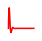

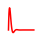

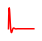

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.linspace(0,10,100)

A_val = []
w_val = []

numGraphs = 3

for i in range(0,numGraphs):
  A = np.random.uniform(0,2.2)
  w = np.random.uniform(0,5.5)
  y = np.exp(-A*t)*np.sin(w*t)

  A_val.append(A)
  w_val.append(w)
  
  fig = plt.figure()
  fig.set_size_inches(0.5,0.5)
  
  plt.axis('off')
  plt.plot(t,y,'r-')

# Data Extractor

In [73]:
inputs = []
outputs = []

def f(t_input,A_input,w_input):
  return np.exp(-A_input*t_input)*np.sin(w_input*t_input)

total = []

for i in range(0,numGraphs): 
    for j in range(0,10):
        inputs.append(j)
        outputs.append(f(j,A_val[i],w_val[i]))

inputs_rev = []
outputs_rev = []

for i in range(0,len(inputs),int(len(inputs)/numGraphs)): 
    inputs_rev.append(inputs[i:i+10])
    outputs_rev.append(outputs[i:i+10])

for i in range(0,len(inputs_rev)):
    for j in range(0, 10):
        inputs_rev[i][j] = round(inputs_rev[i][j])
        outputs_rev[i][j] = round(outputs_rev[i][j],4)
        
total = [inputs_rev, outputs_rev]
points_holder = []

for i in range(0, numGraphs):
    points_holder.append({'Input': total[0][i], 'Output': total[1][i]})

x = []

for i in range(0, len(points_holder)):
    x.append(pd.DataFrame(points_holder[i], columns = ['Input', 'Output']))

print(x[0])

   Input  Output
0      0  0.0000
1      1 -0.1023
2      2  0.0099
3      3  0.0003
4      4 -0.0002
5      5  0.0000
6      6  0.0000
7      7 -0.0000
8      8  0.0000
9      9  0.0000


# Regression Fit

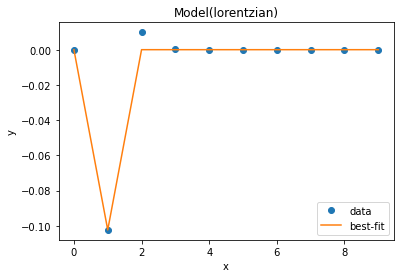

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 587
    # data points      = 10
    # variables        = 3
    chi-square         = 9.8141e-05
    reduced chi-square = 1.4020e-05
    Akaike info crit   = -109.316945
    Bayesian info crit = -108.409190
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude: -0.00132959 (init = 1.893375)
    center:     1.00053873 (init = 4.888889)
    sigma:      7.1385e-05 (init = 4.5)
    fwhm:       1.4277e-04 == '2.0000000*sigma'
    height:    -5.92869659 == '0.3183099*amplitude/max(1e-15, sigma)'


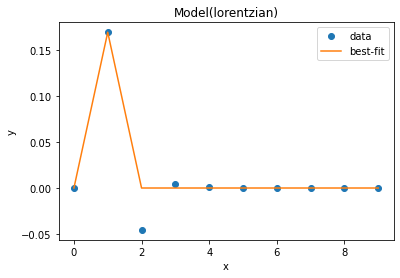

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 476
    # data points      = 10
    # variables        = 3
    chi-square         = 0.00209087
    reduced chi-square = 2.9870e-04
    Akaike info crit   = -78.7275784
    Bayesian info crit = -77.8198231
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  0.00217964 +/-        nan (nan%) (init = 1.207125)
    center:     0.99944133 +/-        nan (nan%) (init = 1)
    sigma:      7.7538e-05 +/-        nan (nan%) (init = 1.5)
    fwhm:       1.5508e-04 +/- 0.00000000 (0.00%) == '2.0000000*sigma'
    height:     8.94783989 +/- 0.00000000 (0.00%) == '0.3183099*amplitude/max(1e-15, sigma)'


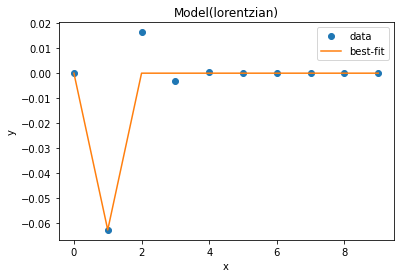

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 448
    # data points      = 10
    # variables        = 3
    chi-square         = 2.7813e-04
    reduced chi-square = 3.9733e-05
    Akaike info crit   = -98.9000470
    Bayesian info crit = -97.9922918
[[Variables]]
    amplitude: -8.0058e-04 +/- 6682.66573 (834725555.02%) (init = 1.3365)
    center:     1.00056482 +/- 112.035086 (11197.18%) (init = 4.888889)
    sigma:      8.0206e-05 +/- 669.663524 (834933155.09%) (init = 4.5)
    fwhm:       1.6041e-04 +/- 1339.38110 (834966850.05%) == '2.0000000*sigma'
    height:    -3.17724890 +/- 53043221.5 (1669470134.08%) == '0.3183099*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  1.000
    C(amplitude, center) = -0.847
    C(center, sigma)     = -0.838


In [133]:
import lmfit

dframe = []

for i in range(0,numGraphs):
    dframe.append(x[i])
    
    lmfit.models.ExpressionModel("exp(-ampl*x) * sin(omega*x)")
    params = model.guess(dframe[i]['Output'], x=dframe[i]['Input'])

    result = model.fit(dframe[i]['Output'], params, x=dframe[i]['Input'])

    result.plot_fit()
    plt.show()

    print(result.fit_report())